In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
X = df.iloc[:,[3,4]].values

In [10]:
wcss = []
for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

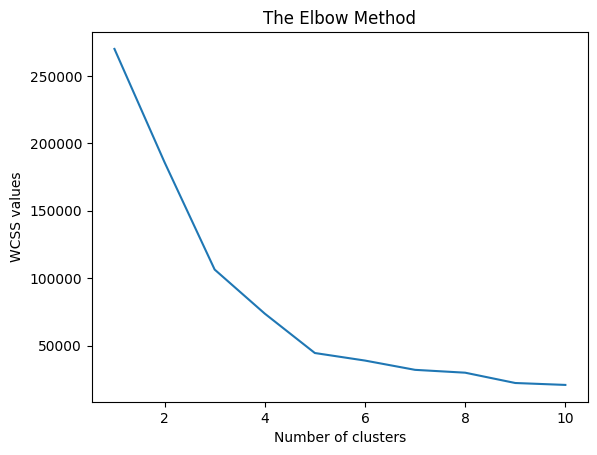

In [11]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS values')
plt.show()

In [14]:
kmeansModel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [15]:
y_kmeans = kmeansModel.fit_predict(X)

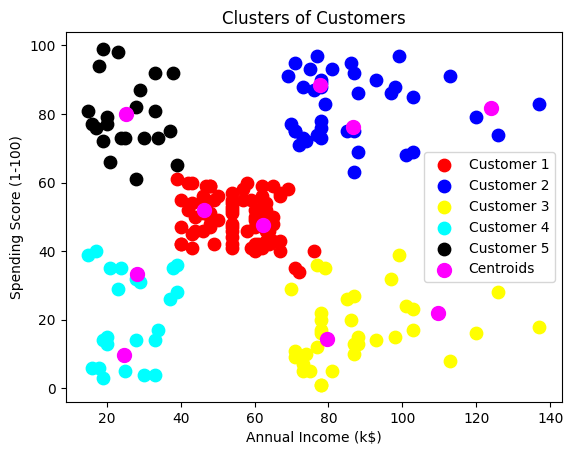

In [17]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=80, c="red", label="Customer 1")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=80, c="blue", label="Customer 2")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=80, c="yellow", label="Customer 3")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=80, c="cyan", label="Customer 4")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=80, c="black", label="Customer 5")
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], s=100, c="Magenta", label="Centroids")
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()